In [1]:
pip install anndata scanpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00:00:010:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import pandas as pd
import scipy
import anndata
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
adata = sc.read_h5ad('/kaggle/input/scanpy/outs/240701_kinker_anndata.h5ad')


In [5]:
def BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=n_top_genes, flavor='seurat')
    #sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, random_state=random_state)
    sc.tl.umap(adata, random_state=random_state)
    sc.tl.leiden(adata, random_state=random_state)
    return adata

In [6]:
adata = BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20)

2024-08-12 22:48:33.832002: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 22:48:33.832079: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 22:48:33.833893: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_309/2934595701.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state=random_state)


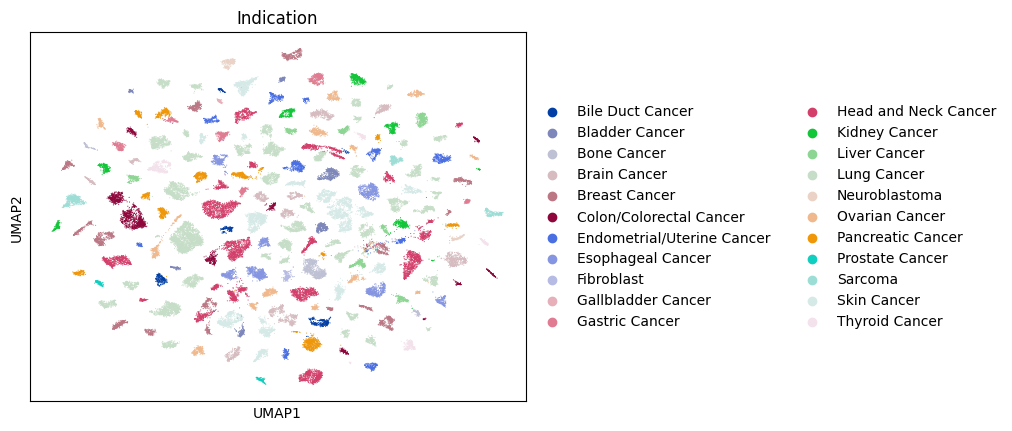

In [7]:
sc.pl.umap(adata, color=['Indication'])

## similartiy of the plot and the Figure 1B of Kinker et al. :
### they are both show variablity of the dataset due to different Cell line and indication
## difference :
### Figure 1B of Kinker et al used tsne to plot clusters
### Figure 1B of Kinker et al showing only a subset of cell lines to show how well cells are assigned to their respective cell lines 


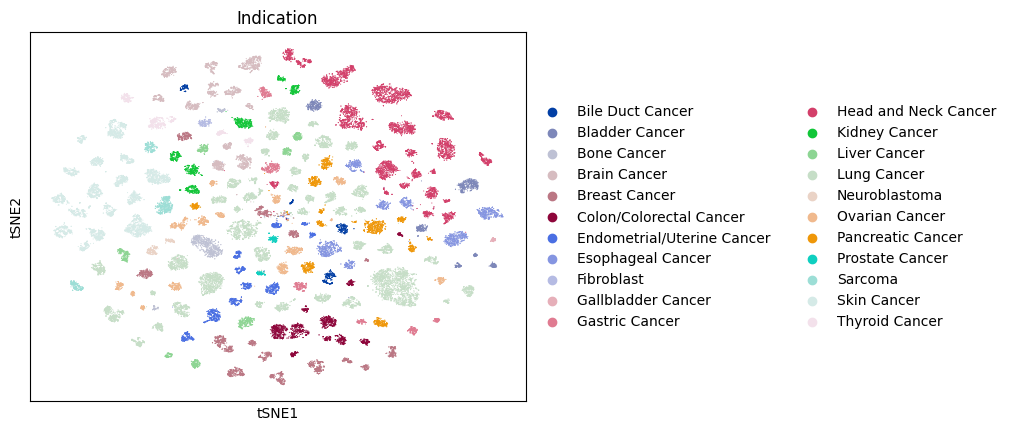

In [8]:
# plotting tSNE 
sc.tl.tsne(adata)
sc.pl.tsne(adata, color=['Indication'])  # Color by gene expression or cluster labels


## # creating a subset_adata for lung, breast, pancreatic, sarcoma and esoph


In [13]:
print(list(adata.obs['Indication'].unique()))

['Lung Cancer', 'Thyroid Cancer', 'Skin Cancer', 'Endometrial/Uterine Cancer', 'Neuroblastoma', 'Liver Cancer', 'Brain Cancer', 'Breast Cancer', 'Bladder Cancer', 'Head and Neck Cancer', 'Gallbladder Cancer', 'Ovarian Cancer', 'Colon/Colorectal Cancer', 'Gastric Cancer', 'Prostate Cancer', 'Kidney Cancer', 'Esophageal Cancer', 'Bile Duct Cancer', 'Pancreatic Cancer', 'Sarcoma', 'Bone Cancer', 'Fibroblast']


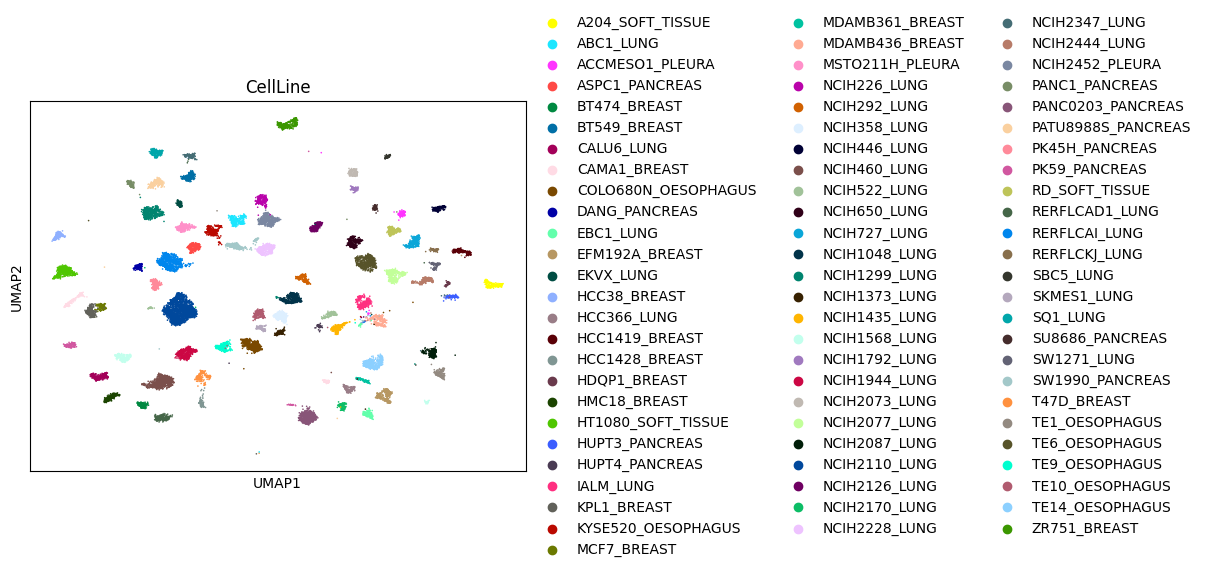

In [36]:

sc.pl.umap(subset_adata, color= 'CellLine')


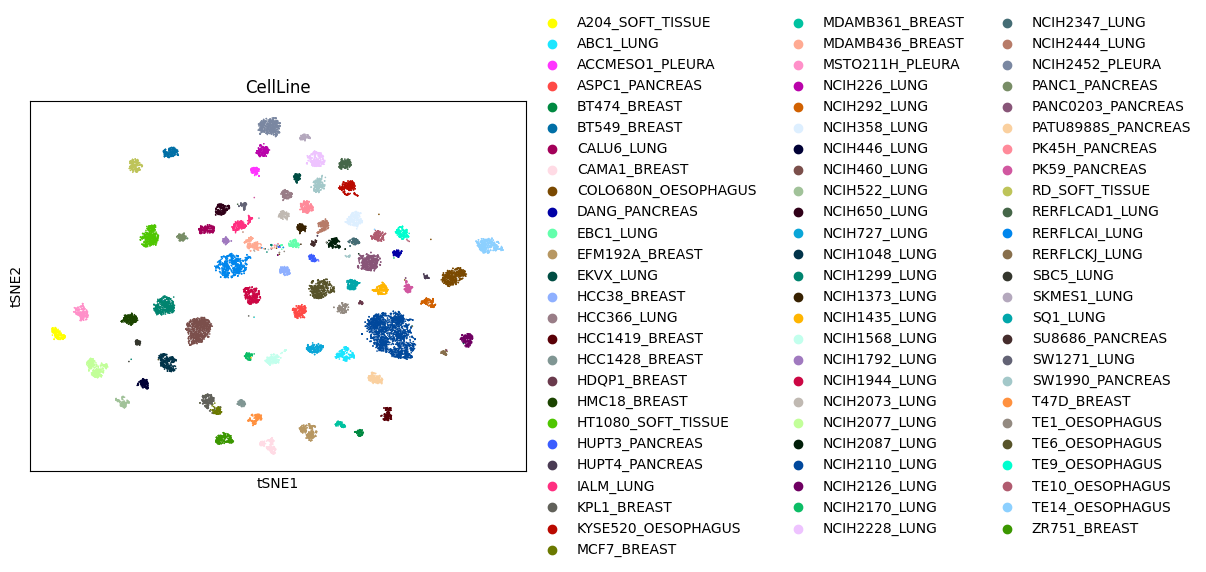

In [28]:
sc.pl.tsne(subset_adata, color='CellLine')

In [26]:
adata.obs['CellLine']


AAACCTGAGACATAAC-1-18                       NCIH2126_LUNG
AAACCTGCACAACGCC-1-18                       SW579_THYROID
AAACCTGCAGACAAGC-1-18                            C32_SKIN
AAACCTGCAGCTCGAC-1-18                       SW579_THYROID
AAACCTGCATGGATGG-1-18                        NCIH446_LUNG
                                       ...               
c4788                    JHU029_UPPER_AERODIGESTIVE_TRACT
c4789                      SCC9_UPPER_AERODIGESTIVE_TRACT
c4793                    JHU029_UPPER_AERODIGESTIVE_TRACT
c4800                      SCC9_UPPER_AERODIGESTIVE_TRACT
c4812                      SCC9_UPPER_AERODIGESTIVE_TRACT
Name: CellLine, Length: 53513, dtype: category
Categories (198, object): ['42MGBA_CENTRAL_NERVOUS_SYSTEM', '93VU_UPPER_AERODIGESTIVE_TRACT', '8305C_THYROID', '2313287_STOMACH', ..., 'VMRCRCZ_KIDNEY', 'WM88_SKIN', 'YD38_UPPER_AERODIGESTIVE_TRACT', 'ZR751_BREAST']

# trying to construct the F2B

In [62]:
# getting out the full name of the cellline 
# i tried this for every cell line in the figure
l=[]
for i in adata.obs['CellLine']:
    if 'JHU' in i:
        l.append(i)
print(pd.Series(l).unique())

['JHU029_UPPER_AERODIGESTIVE_TRACT' 'JHU011_UPPER_AERODIGESTIVE_TRACT'
 'JHU006_UPPER_AERODIGESTIVE_TRACT']


In [63]:
# creating a subset of the NCIH2126_LUNG to see intra tumer heterogeneity 
NCIH2126_LUNG_ad=adata[adata.obs['CellLine']=='NCIH2126_LUNG']
NCIH1299_LUNG_ad=adata[adata.obs['CellLine']=='NCIH1299_LUNG']
CAKI2_KIDNEY_ad= adata[adata.obs['CellLine']=='CAKI2_KIDNEY']
JHU006_UPPER_AERODIGESTIVE_TRACT_ad=adata[adata.obs['CellLine']=='JHU006_UPPER_AERODIGESTIVE_TRACT']


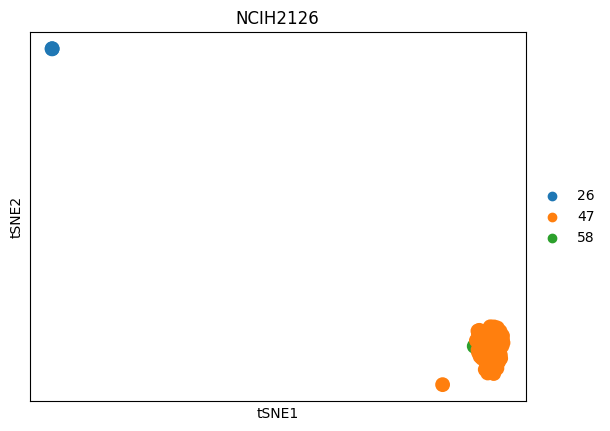

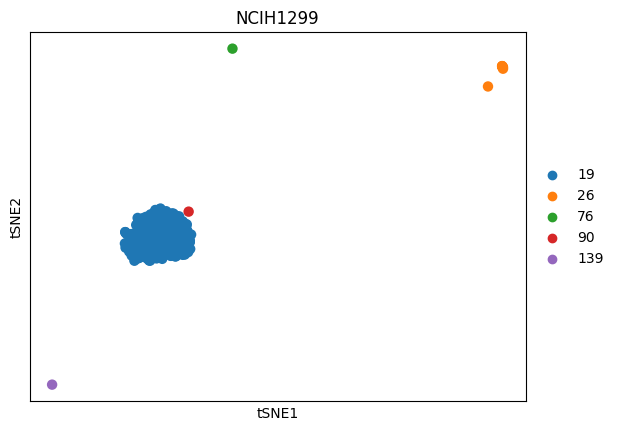

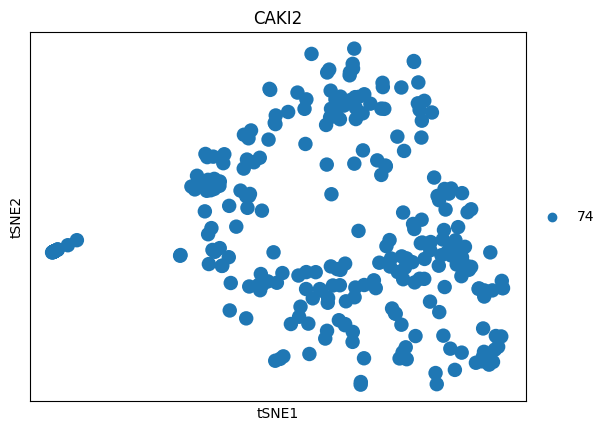

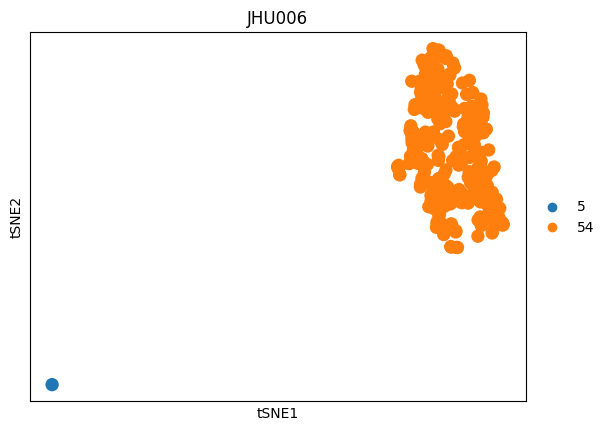

In [68]:
#ploting the tsne
sc.pl.tsne(NCIH2126_LUNG_ad, color='leiden', title='NCIH2126')
sc.pl.tsne(NCIH1299_LUNG_ad, color='leiden', title='NCIH1299')
sc.pl.tsne(CAKI2_KIDNEY_ad, color='leiden', title='CAKI2')
sc.pl.tsne(JHU006_UPPER_AERODIGESTIVE_TRACT_ad, color='leiden', title='JHU006')

### the plots looks significantly different from the f2b
### IDK why

In [21]:
subset_adata=adata[(adata.obs['Indication']=='Lung Cancer')|
                   (adata.obs['Indication']=='Breast Cancer')|
                   (adata.obs['Indication']=='Pancreatic Cancer')|
                   (adata.obs['Indication']=='Sarcoma')|
                  (adata.obs['Indication']=='Esophageal Cancer')].copy()